# Image segmentation 

In image segmentation, instead of assigning a class to a whole image as in [image classification](imageclassification.md), we want to classify each pixel of an image. Let's load the CamVid segmentation dataset using [`loadtaskdata`](#) to look at the data:

In [8]:
]activate

  Activating environment at `~/.julia/environments/v1.6/Project.toml`


In [7]:
using FastAI
using FastAI.Datasets
using CairoMakie

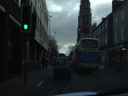

In [6]:
taskdata = Datasets.loadtaskdata(Datasets.datasetpath("camvid_tiny"), FastAI.ImageSegmentationTask);
image = getobs(taskdata, 1).input

Every pixel in this image is assigned one of the following classes:

In [4]:
classes = Datasets.getclassessegmentation("camvid_tiny")

32-element Vector{String}:
 "Animal"
 "Archway"
 "Bicyclist"
 "Bridge"
 "Building"
 "Car"
 "CartLuggagePram"
 "Child"
 "Column_Pole"
 "Fence"
 "LaneMkgsDriv"
 "LaneMkgsNonDriv"
 "Misc_Text"
 ⋮
 "SignSymbol"
 "Sky"
 "SUVPickupTruck"
 "TrafficCone"
 "TrafficLight"
 "Train"
 "Tree"
 "Truck_Bus"
 "Tunnel"
 "VegetationMisc"
 "Void"
 "Wall"

[`ImageSegmentation`](#) is the [learning method](../tutorials/learning_methods.md) for this task. We can pass it the classes and an input image size a model will be trained on. As always, you can click on a symbol to look up its documentation and find out about other, optional, arguments.

In [5]:
method = ImageSegmentation(classes, (96, 128))

ImageSegmentation{2}(["Animal", "Archway", "Bicyclist", "Bridge", "Building", "Car", "CartLuggagePram", "Child", "Column_Pole", "Fence"  …  "SUVPickupTruck", "TrafficCone", "TrafficLight", "Train", "Tree", "Truck_Bus", "Tunnel", "VegetationMisc", "Void", "Wall"], 1, ProjectiveTransforms((96, 128)), ImagePreprocessing())

With a `method` and `taskdata`, the only thing we need before we can create a `Learner` is a backbone architecture to build the segmentation model from. We'll use a pretrained model from Metalhead.jl (see the [setup instructions](../setup.md)), but you can use any convolutional architecture and a suitable model will be constructed from it (see [`UNetDynamic`](#)).

In [13]:
using Metalhead
backbone = Metalhead.resnet50(pretrain=true)[1:end-3]
learner = methodlearner(method, taskdata, backbone, ToGPU())

Learner()

We can grab a batch of data and visualize it. Here every color in the target mask represents a different class.

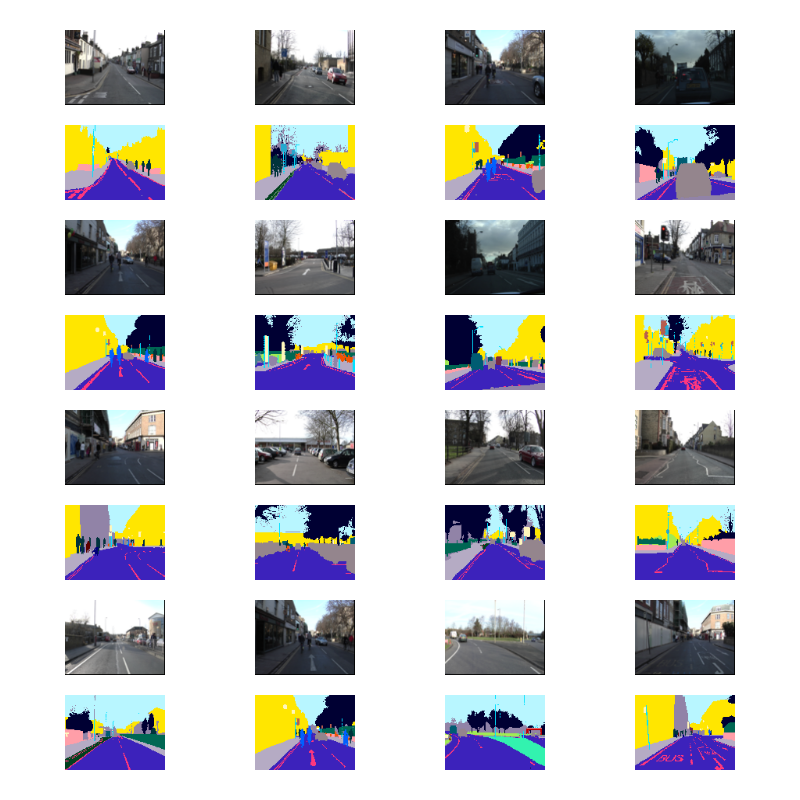

In [26]:
xs, ys = first(learner.data.training)
FastAI.plotbatch(method, xs, ys)

Now let's finetune the model:

In [17]:
finetune!(learner, 10, 0.1)

Epoch 1 TrainingPhase(): 100%|██████████████████████████| Time: 0:06:32


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   1.0 │ 3.47973 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬────────────┐
│           Phase │ Epoch │       Loss │
├─────────────────┼───────┼────────────┤
│ ValidationPhase │   1.0 │ 2.92224e14 │
└─────────────────┴───────┴────────────┘


Epoch 2 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:03


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   2.0 │ 3.07057 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬───────────┐
│           Phase │ Epoch │      Loss │
├─────────────────┼───────┼───────────┤
│ ValidationPhase │   2.0 │ 1.05957e5 │
└─────────────────┴───────┴───────────┘


Epoch 3 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   3.0 │ 2.78779 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   3.0 │ 21.4402 │
└─────────────────┴───────┴─────────┘


Epoch 4 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   4.0 │ 2.37204 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   4.0 │ 1863.21 │
└─────────────────┴───────┴─────────┘


Epoch 5 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   5.0 │ 1.91436 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   5.0 │ 906.464 │
└─────────────────┴───────┴─────────┘


Epoch 6 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   6.0 │ 1.65757 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬────────┐
│           Phase │ Epoch │   Loss │
├─────────────────┼───────┼────────┤
│ ValidationPhase │   6.0 │ 223.28 │
└─────────────────┴───────┴────────┘


Epoch 7 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   7.0 │ 1.51002 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   7.0 │ 16.3071 │
└─────────────────┴───────┴─────────┘


Epoch 8 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   8.0 │ 1.42061 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   8.0 │ 3.11047 │
└─────────────────┴───────┴─────────┘


Epoch 9 TrainingPhase(): 100%|██████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │   9.0 │ 1.35586 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │   9.0 │ 1.96541 │
└─────────────────┴───────┴─────────┘


Epoch 10 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  10.0 │ 1.31739 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  10.0 │ 1.64965 │
└─────────────────┴───────┴─────────┘


Epoch 11 TrainingPhase(): 100%|█████████████████████████| Time: 0:00:00


┌───────────────┬───────┬─────────┐
│         Phase │ Epoch │    Loss │
├───────────────┼───────┼─────────┤
│ TrainingPhase │  11.0 │ 1.30242 │
└───────────────┴───────┴─────────┘
┌─────────────────┬───────┬─────────┐
│           Phase │ Epoch │    Loss │
├─────────────────┼───────┼─────────┤
│ ValidationPhase │  11.0 │ 1.52169 │
└─────────────────┴───────┴─────────┘


Learner()

And look at the results on a batch of validation data:

In [21]:
xs, ys = first(learner.data.validation);
ŷs = learner.model(gpu(xs)) |> cpu;

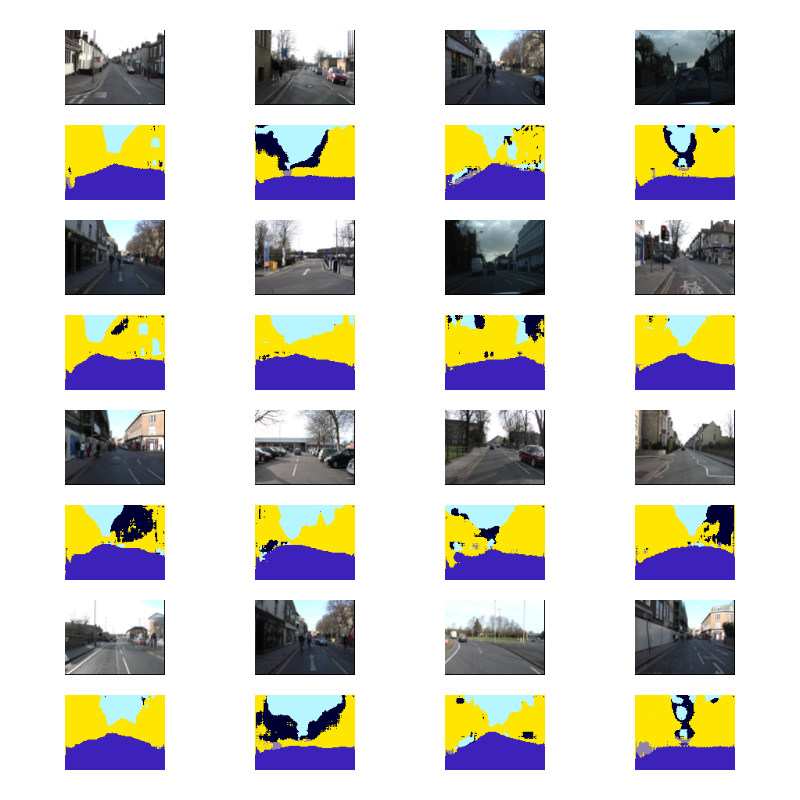

In [28]:
FastAI.plotbatch(method, xs, ŷs)